## First we start with some definitions

## Define some colors and text settings used for plotting

In [166]:
# Define some colors
ozblue = '#8CA1C3'
ozblue_shade = '#E2E9F4'
tempred = '#DB6816'
txtblue = '#5E77A1'
color_plot_window = '#FFF6D0'

# Define some text sizes
Station_size = 24
Date_size = 18
Axis_size = 18
Column_size = 18

## Function for calculating the total ozone column 

Function calc_totoz
The `calc_totoz` function calculates the total ozone column from the given ozone concentration, ozone partial pressure, altitude, temperature, and the number of data points. The function performs the following steps:

1. **Initialize Constants**: Boltzmann constant, gas constant, standard temperature, Avogadro's number, and standard pressure.
2. **Calculate Column Ozone**: Integrate the ozone concentration over the altitude to get the column ozone.
3. **Convert to Dobson Units**: Convert the column ozone to Dobson Units (DU).
4. **Calculate Residual Ozone**: Add the residual ozone at the top altitude.
5. **Return Total Ozone**: Return the total ozone in Dobson Units.

The function prints intermediate values for debugging purposes.

In [167]:
def calc_totoz(o3_conc, o3, z, te, k):
    boltz = 1.3806503E-23
    Rgas = 8.3144621
    Tz = 273.15
    Navo = 6.02214129e23
    P0 = 1013.25 * 100.
    col_oz = 0.0

    print('First and last ozone values (o3_conc and o3 where; o3_conc = o3 * 1.0e-3 / (boltz * ktemp) and o3 = O3.PARTIAL.PRESSURE_INSITU in mPa)= ', o3_conc[0], o3_conc[k-1], o3[0], o3[k-1])
    for i in range(0, k-1):
        col_oz = col_oz + 1000*(z[i+1] - z[i])*(o3_conc[i] + o3_conc[i+1])/2

    print('Ozone column =', col_oz)
    col_oz = col_oz / (10000.0 * Navo)
    n100 = P0 * 1.0e-7 / (Rgas * Tz)
    col_oz = 100.0 * col_oz / n100

    print ('Start altitude, Stop altitude in km = ', z[0], z[k-1])

    resid = o3[k-1]*7.8962
    totoz = col_oz + resid
    return totoz

## Function for calculating the ozone between 14 and 20 km

In [168]:
def calc_12_20(o3_conc, z, te, k):
    boltz = 1.3806503E-23
    Rgas = 8.3144621
    Tz = 273.15
    Navo = 6.02214129e23
    P0 = 1013.25 * 100.

    if z[k-1] <= 20.0:
        print('Sonde did not reach 20 km')
        col_oz = -999.9
        return col_oz

    for i in range(0, k):
        if z[i] <= 12.0 and z[i+1] > 12.0:
            i_min = i
        if z[i] <= 20.0 and z[i+1] > 20.0:
            i_max = i

    print('14-20 km min O3 occurance and its altutide, max O3 occurance and its altitude = ', i_min, z[i_min], i_max, z[i_max])
    
    col_oz = 0.0
    for i in range(i_min, i_max+1):
        col_oz = col_oz + 1000 * (z[i+1] - z[i]) * (o3_conc[i] + o3_conc[i+1]) / 2

    col_oz = col_oz / 10000.0
    col_oz = col_oz / Navo

    n100 = P0 * 0.1 * 1.0e-6 / (Rgas * Tz)
    col_oz = 100.0 * col_oz / n100

    #print('Start altitude, Stop altitude in km = ',z[0], z[k-1])
    return col_oz


## Function for calculating the ozone between 14 and 21 km

In [169]:
def calc_14_21(o3_conc, z, te, k):
    boltz = 1.3806503E-23
    Rgas = 8.3144621
    Tz = 273.15
    Navo = 6.02214129e23
    P0 = 1013.25 * 100.

    if z[k-1] < 20.0:
        print('Sonde did not reach 20 km')
        col_oz = -999.9
        return col_oz

    for i in range(0, k):
        if z[i] <= 14.0 and z[i+1] > 14.0:
            i_min = i
        if z[i] <= 21.0 and z[i+1] > 21.0:
            i_max = i

    print('14-21 km min O3 occurance and its altutide, max O3 occurance and its altitude = ', i_min, z[i_min], i_max, z[i_max])

    col_oz = 0.0
    for i in range(i_min, i_max+1):
        col_oz = col_oz + 1000 * (z[i+1] - z[i]) * (o3_conc[i] + o3_conc[i+1]) / 2

    col_oz = col_oz / 10000.0
    col_oz = col_oz / Navo
    print('14-21 km partial ozone column: ', col_oz, ' molecules per cm2')

    n100 = P0 * 0.1 * 1.0e-6 / (Rgas * Tz)
    col_oz = 100.0 * col_oz / n100

    #print('Start altitude, Stop altitude in km = ', z[0], z[k-1])
    return col_oz

## Open and read file
In this section, we will Open and read the file you want to visualize and print the datasets in it

In [170]:
import h5py

# Define the file path
file_path = 'balloon_sonde.o3_dwd000_hohenpeissenberg_20240529t045700z_20240529t064520z_003.h5'

# Open the HDF5 file
try:
    with h5py.File(file_path, 'r') as hdf:
        print("File opened successfully.")
        # List all groups
        print("File content: %s" % hdf.keys())
    
except Exception as e:
    print(f"An error occurred: {e}")

File opened successfully.
File content: <KeysViewHDF5 ['ALTITUDE.GPH', 'ALTITUDE.GPH_UNCERTAINTY.COMBINED.STANDARD', 'AUXILIARY.PARAMETERS', 'DATETIME', 'HUMIDITY.RELATIVE_INSITU', 'HUMIDITY.RELATIVE_INSITU_UNCERTAINTY.COMBINED.STANDARD', 'INTERNAL.BOX.TEMPERATURE_INSITU', 'LATITUDE', 'LONGITUDE', 'O3.MIXING.RATIO.VOLUME_INSITU', 'O3.NUMBER.DENSITY_INSITU', 'O3.PARTIAL.PRESSURE_INSITU', 'O3.PARTIAL.PRESSURE_INSITU_UNCERTAINTY.COMBINED.STANDARD', 'PRESSURE_INSITU', 'PRESSURE_INSITU_UNCERTAINTY.COMBINED.STANDARD', 'PUMP.CORRECTION_INDEPENDENT', 'SOURCE.PRODUCT', 'TEMPERATURE_INSITU', 'TEMPERATURE_INSITU_UNCERTAINTY.COMBINED.STANDARD', 'WIND.DIRECTION_INSITU', 'WIND.SPEED_INSITU']>


## Data Processing

In this section, we will check if the required datasets exist in the HDF5 file and process the data accordingly. The required datasets are:
- `O3.PARTIAL.PRESSURE_INSITU`
- `ALTITUDE.GPH`
- `TEMPERATURE_INSITU`
- `PRESSURE_INSITU`

We will filter out invalid data points and calculate the ozone concentration.

In [173]:
# Check if required datasets exist
required_datasets = ['O3.PARTIAL.PRESSURE_INSITU', 'ALTITUDE.GPH', 'TEMPERATURE_INSITU', 'PRESSURE_INSITU']
try:
    with h5py.File(file_path, 'r') as hdf:
        if all(dataset in hdf for dataset in required_datasets):
            o3r = hdf['O3.PARTIAL.PRESSURE_INSITU'][:]
            gphr = hdf['ALTITUDE.GPH'][:]
            tempr = hdf['TEMPERATURE_INSITU'][:]
            pressr = hdf['PRESSURE_INSITU'][:]
            
            # Identify indices where O3.PARTIAL.PRESSURE has missing values
            valid_indices = (o3r != -90000.0) & (o3r <= 90)
            
            # Create new arrays without missing values
            o3 = o3r[valid_indices]
            gph = gphr[valid_indices]  # Divide by 1000
            temp = tempr[valid_indices]
            press = pressr[valid_indices]
            
            # If tempreature is in Kelvin in file, adjust
            temp = (tempr[valid_indices] - 273.15)
            #print('AMF temp from file = ', temp)
            # Define Kelvintemperature and other constants
            ktemp = temp + 273.15 
            boltz = 1.380649e-23  # Boltzmann constant in J/K
            o3_conc = o3 * 1.0e-3 / (boltz * ktemp)
            numofgph = len(gph) - 1
            gph = gph / 1000.
            topalt = gph[numofgph]
            
            print("Datasets processed successfully.")
        else:
            print("Required datasets are missing.")
except Exception as e:
    print(f"An error occurred: {e}")

Datasets processed successfully.


## Call functions and calculate ozone values

In [181]:
# Calculate total ozone using the calc_totoz function
totoz = calc_totoz(o3_conc, o3, gph, temp, numofgph+1)
print(f"Total ozone: {totoz} DU")

# Create string with total ozone (as an integer) for use on plot. The round function creates a float, so we
# must use the int function after that.
ctotoz= str(int(round(totoz)))
print(f"Total ozone rounded: {ctotoz} DU")


# Calculate the 12-20 km and the 14-21 km partial column
if topalt > 20.0:
    col_12_20 = calc_12_20(o3_conc, gph, ktemp, numofgph)
    print('12-20 km column = ', col_12_20)
    ccol_12_20 = str(int(round(col_12_20)))
else:
    ccol_14_21 = ' '
    ccol_12_20 = ' '
                    
if topalt > 21.0:
    col_14_21 = calc_14_21(o3_conc, gph, ktemp, numofgph)
    print ('14-21 km column = ', col_14_21)
    ccol_14_21 = str(int(round(col_14_21)))
else:
    ccol_14_21 = ' '
    
    

First and last ozone values (o3_conc and o3 where; o3_conc = o3 * 1.0e-3 / (boltz * ktemp) and o3 = O3.PARTIAL.PRESSURE_INSITU in mPa)=  6.6228746e+17 1.2809455e+18 2.59 0.0
Ozone column = 9.358665303986167e+22
Start altitude, Stop altitude in km =  0.976 34.2305
Total ozone: 348.32265789148295 DU
Total ozone rounded: 348 DU
14-20 km min O3 occurance and its altutide, max O3 occurance and its altitude =  226 11.9625 396 19.989199
12-20 km column =  114.527893667854
14-21 km min O3 occurance and its altutide, max O3 occurance and its altitude =  272 14.0 415 20.9744
14-21 km partial ozone column:  4.475438752073616e-06  molecules per cm2
14-21 km column =  100.3123416381377


## Visualize the data

Total ozone: 34.28310012817383 DU


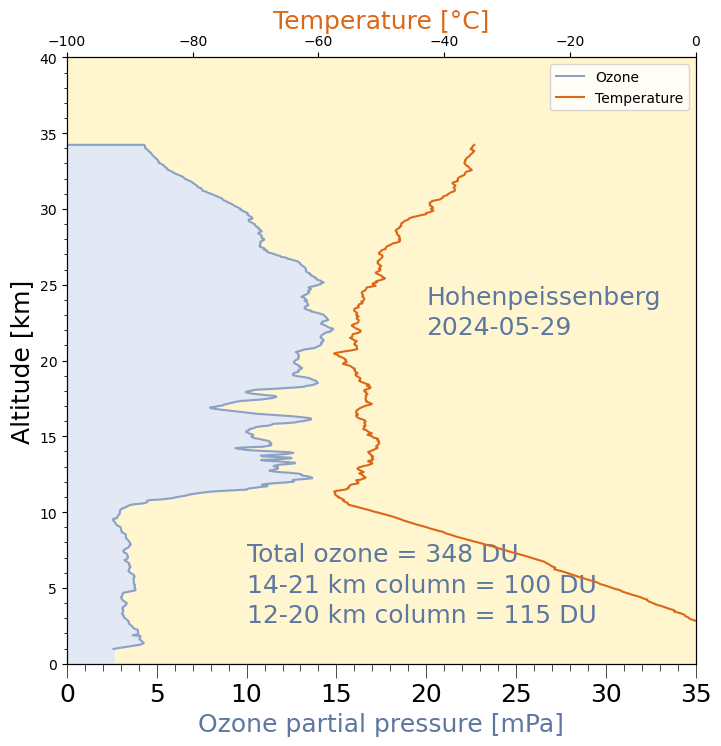

In [184]:
import matplotlib.pyplot as plt
# Fix array a bit so that we can print a nice shaded area of ozone
gph[numofgph] = gph[numofgph - 1]
o3[numofgph] = 0.0
temp[numofgph] = temp[numofgph - 1]

# Plotting the cleaned O3.PARTIAL.PRESSURE as a function of cleaned ALTITUDE.GPH
fig, ax1 = plt.subplots()
fig.set_size_inches(20.6/2.54, 20.0/2.54)
# Set the background colour of the plot
plt.gca().patch.set_facecolor(color_plot_window)
            
plt.minorticks_on()
            
ax1.tick_params('x', length=10, width=0.5, which='major', labelsize=Axis_size)
ax1.tick_params('x', length=5, width=0.5, which='minor')
            
# Set some tick marks
ax1.set_facecolor(color_plot_window)
line1, = ax1.plot(o3, gph, color=ozblue, label='Ozone')
ax1.set_xlabel('Ozone partial pressure [mPa]', color=txtblue, fontsize=Axis_size)
ax1.set_ylabel('Altitude [km]', fontsize=Axis_size)
ax1.set_xlim(0, 35)
ax1.set_ylim(0, 40)  # Updated y-axis range
            
# Fill the region between the ozone curve and the y axis with a light blue shading
plt.fill_between(o3, 0, gph, where=None, color=ozblue_shade)
xrect = [0., 10.0]
yrect = [gph[0], gph[0]]
            
# Create a second x-axis on top for TEMPERATURE
ax2 = ax1.twiny()
line2, = ax2.plot(temp, gph, color=tempred, label='Temperature')
ax2.set_xlabel('Temperature [°C]', color=tempred, fontsize=Axis_size)
ax2.set_xlim(-100, 0)
            
# Add text annotations
ax1.text(20, 25, 'Hohenpeissenberg', fontsize=Date_size, ha='left', va='top', color=txtblue)
ax1.text(20, 23, '2024-05-29', fontsize=Date_size, ha='left', va='top', color=txtblue)
            
# Add legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')
            
print(f"Total ozone: {topalt} DU")
if topalt > 20.0:
    ax1.text(10, 8, 'Total ozone = ' + ctotoz + ' DU', fontsize=Column_size, ha='left', va='top', color=txtblue)
else:
    ax1.text(10, 8, 'Total ozone undefined', fontsize=Column_size, ha='left', va='top', color=txtblue)

if topalt > 21.0:
    ax1.text(10, 6, '14-21 km column = ' + ccol_14_21 + ' DU', fontsize=Column_size, ha='left', va='top', color=txtblue)
    ax1.text(10, 4, '12-20 km column = ' + ccol_12_20 + ' DU', fontsize=Column_size, ha='left', va='top', color=txtblue)
elif topalt > 20.0:
    ax1.text(10, 6, '12-20 km column = ' + ccol_12_20 + ' DU', fontsize=Column_size, ha='left', va='top', color=txtblue)
else:
    ax1.text(10,6, 'Partial column undefined', fontsize=Column_size, ha='left', va='top', color=txtblue)
    
                
    
                
plt.show()